In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

%matplotlib inline

In [2]:
#Function to fix the time (string)
def fixTime(df):
    '''This function takes the dataframe as an argument and 
    converts the string Lap Time column to be a datetime
    and then converts the datetime column to be a float.
    The function then returns the dataframe with those two
    columns appended to the right'''
    
    # TODO: Check to make sure that the 'Lap Time' column
    #       exists.
    # TODO: Check to make sure that the 'Lap Time' column
    #       is the right format
    
    df = df.assign(dtLapTime = pd.to_datetime('0:0:' + df['Lap Time'] + '0',
                                             exact = False, errors = 'ignore',
                                             format = "%H:%M:%S.%f").apply(lambda x: x.time()))
    df = df.assign(fLapTime = df.dtLapTime.apply(lambda x: ((x.hour * 60 + x.minute) * 60 + x.second) * 1000000 + x.microsecond) / 1000000)
    return df


def getCarData(df, car_num, max_time):
    # make sure car exists
    # make a default max time val
    return df[(df['Car'] == car_num) & (df['Flag'] == 'Green') & (df['fLapTime'] < max_time)]


def getCarsData(df, car_nums, max_time, strDfName):
    # make sure car exists
    # make a default max time val
    #df[df['A'].isin([3, 6])]
    df = df[(df['Car'].isin(car_nums)) & (df['Flag'] == 'Green') & (df['fLapTime'] < max_time)].copy()
    df['SetName'] = strDfName
    return df

Question: Did the Ford GT cars or drivers exhibit a performance delta from the Roar (Test) to the 24 Race?

Assumption 1: Assume the Roar qualifying session would be the "true" performance of the car/team at the test session since the results of this session were used to select pit stalls for the 24 Hr race.

Assumption 2: Assume the team ran flat out during the 24hr race due to the prestige of winning this event. IE: No reason to sandbag at this event.

In [3]:
# Setup paths to the pertinent data files

# Roar Before the 24 Qualifying Data
strRoarQ = 'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC ROAR Qualifying.csv'

# 24 Hrs of Daytona Qualifying and Race Data
strQ =     'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC Daytona Qualifying.csv'
strR =     'C:\\Users\\gator\\Documents\\GitHub\\IMSA2017\\LapData\\2018\\IWSC Daytona Race.csv'

# Read the data
dfRQ = pd.read_csv(strRoarQ)
dfQ = pd.read_csv(strQ)
dfR = pd.read_csv(strR)

# Fix the time column
dfRQ = fixTime(dfRQ)
dfQ  = fixTime(dfQ)
dfR  = fixTime(dfR)

In [4]:
narrow_columns = ['Car','Class', 'Lap', 'Flag', 'Lap Time','fLapTime']
fords = [66, 67]
chevy = [3,4]

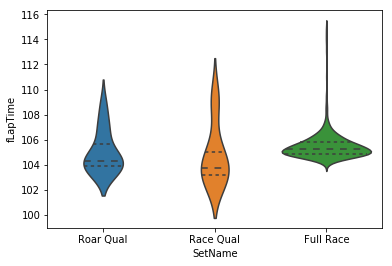

In [5]:
dfRQ_fords = getCarsData(dfRQ[narrow_columns], fords, 115, 'Roar Qual')
dfQ_fords = getCarsData(dfQ[narrow_columns], fords, 115, 'Race Qual')
dfR_fords = getCarsData(dfR[narrow_columns], fords, 115, 'Full Race')
ford_frames = [dfRQ_fords, dfQ_fords, dfR_fords]
df_fords = pd.concat(ford_frames)
sns.violinplot(df_fords.SetName , df_fords.fLapTime, inner="quartile")

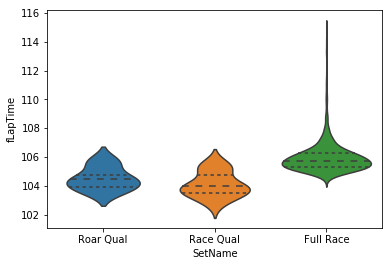

In [6]:

dfrq_chevy = getCarsData(dfRQ[narrow_columns], chevy, 115, 'Roar Qual')
dfq_chevy = getCarsData(dfQ[narrow_columns], chevy, 115, 'Race Qual')
dfr_chevy = getCarsData(dfR[narrow_columns], chevy, 115, 'Full Race')
chevy_frames = [dfrq_chevy, dfq_chevy, dfr_chevy]
df_chevy = pd.concat(chevy_frames)
sns.violinplot(df_chevy.SetName , df_chevy.fLapTime, inner="quartile")

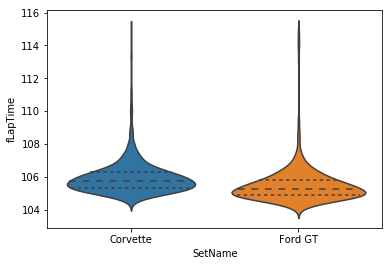

In [7]:
df_chevy = getCarsData(dfR[narrow_columns], chevy, 115, 'Corvette')
df_ford = getCarsData(dfR[narrow_columns], fords, 115, 'Ford GT')
race_frames = [df_chevy, df_ford]
df_race = pd.concat(race_frames)
sns.violinplot(df_race.SetName, df_race.fLapTime, inner='quartile')

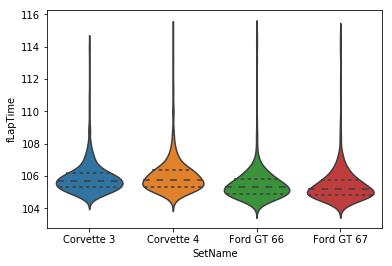

In [8]:
df_chevy3 = getCarsData(dfR[narrow_columns], [3], 115, 'Corvette 3')
df_chevy4 = getCarsData(dfR[narrow_columns], [4], 115, 'Corvette 4')
df_ford66 = getCarsData(dfR[narrow_columns], [66], 115, 'Ford GT 66')
df_ford67 = getCarsData(dfR[narrow_columns], [67], 115, 'Ford GT 67')
race_frames = [df_chevy3, df_chevy4, df_ford66, df_ford67]
df_race2 = pd.concat(race_frames)
sns.violinplot(df_race2.SetName, df_race2.fLapTime, inner='quartile')

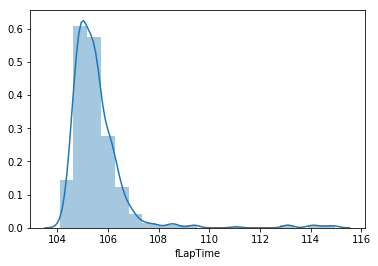

In [9]:
sns.distplot(df_ford66.fLapTime, bins = 20)